In [1]:
import numpy as np
import pandas as pd
from glmnet import GLMNet
from sklearn.base import clone
import matplotlib.pyplot as plt
import rpy2
%load_ext rpy2.ipython

In [2]:
%%R -o X,Y,N
#install.packages('lars', repo='http://cloud.r-project.org')
library(lars)
data(diabetes)
X = model.matrix(lm(y ~ x, data=diabetes))[,-1]
N = colnames(diabetes$x)
Y = diabetes$y

Loaded lars 1.3



In [3]:
X = pd.DataFrame(X, columns=N)

In [4]:
G = GLMNet(alpha=1)
G.fit(X, Y)
G.cross_validation_path(X, Y, alignment='lambda')

(           GLMFamilySpec Deviance  Mean Squared Error  Mean Absolute Error  \
 lambda                                                                       
 45.160030             5824.923773         5824.923773            65.172866   
 41.148137             5564.570624         5564.570624            63.692485   
 37.492650             5188.255784         5188.255784            61.606167   
 34.161907             4857.628032         4857.628032            59.716211   
 31.127057             4583.044554         4583.044554            58.027280   
 ...                           ...                 ...                  ...   
 0.034966              2999.716140         2999.716140            44.223350   
 0.031860              3000.290030         3000.290030            44.227783   
 0.029029              3000.738197         3000.738197            44.231232   
 0.026450              3001.148665         3001.148665            44.234374   
 0.024101              3000.811707         3000.8117

<Axes: xlabel='$-\\log(\\lambda)$', ylabel='Coefficients ($\\beta$)'>

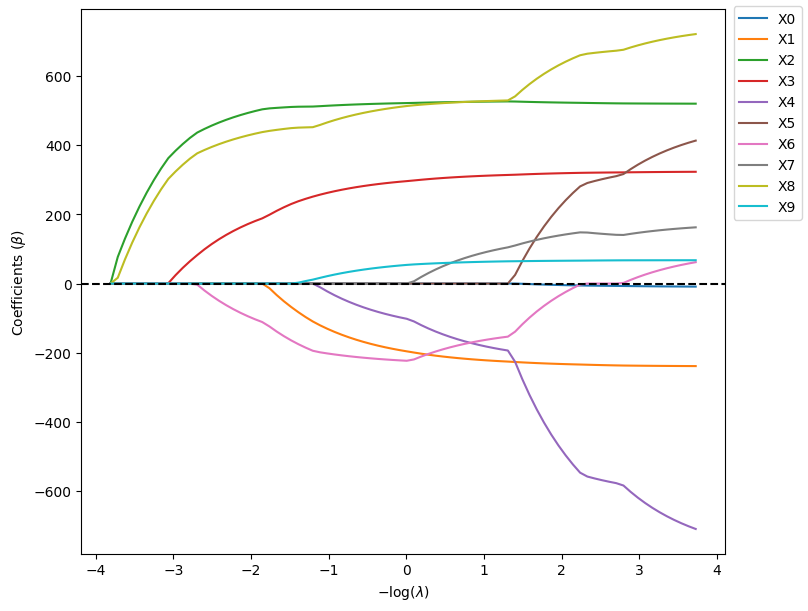

In [5]:
fig, ax = plt.subplots(figsize=(8,6), layout='constrained')
G.plot_coefficients(legend=True, ax=ax)

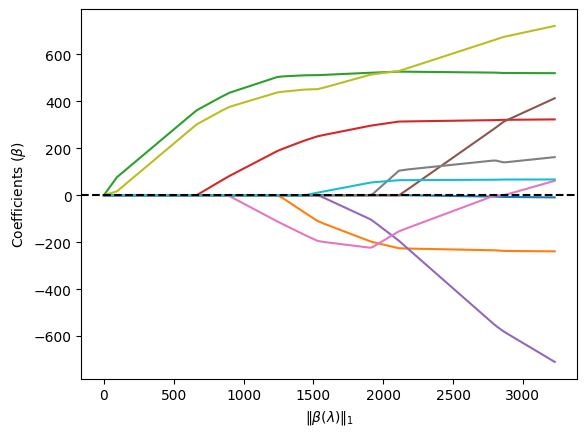

In [6]:
G.plot_coefficients(xvar='norm');

<Axes: xlabel='$-\\log(\\lambda)$', ylabel='GLMFamilySpec Deviance'>

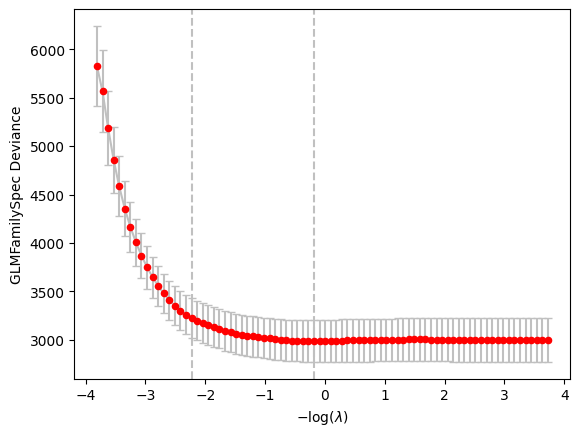

In [7]:
G.plot_cross_validation()

<Axes: xlabel='$\\|\\beta(\\lambda)\\|_1$', ylabel='GLMFamilySpec Deviance'>

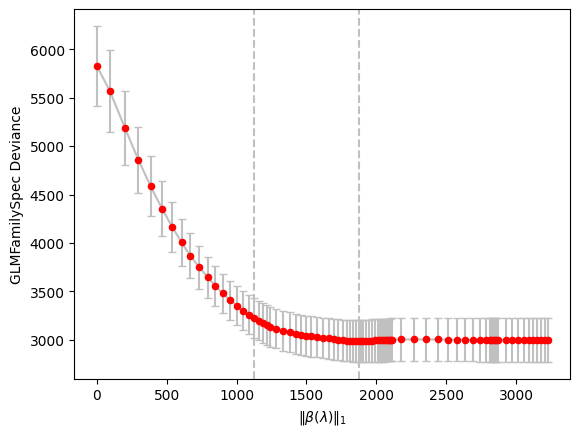

In [8]:
G.plot_cross_validation(xvar='norm')

In [10]:
G2 = clone(G)
G2.fit(X, Y)
G2.cross_validation_path(X, Y, alignment='fraction')
G2.plot_cross_validation(c='green', label='My label', legend=True, col_1se='blue')

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 78 and the array at index 1 has size 82